# Introduction

This notebook walk you through the __xverse__ package in detail. It provides codes for the same, so you can use this as a template to apply on your data.

# Import data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/bank.csv',sep='|')

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


# 1. Feature Subset

This option is used to select a subset of features from the dataset. A list of features should be provided to subset. 

In [3]:
from xverse.feature_subset import FeatureSubset

numerical_features = list(df._get_numeric_data().columns)
categorical_features = list(df.columns.difference(numerical_features))
print(numerical_features)

clf = FeatureSubset(numerical_features) #select only numeric features
df = clf.fit_transform(df) #returns the dataframe with selected features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'target']


/Users/mbagav200/anaconda/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/mbagav200/Downloads/XuniVerse-master/xverse/graph/_bivariate_charts.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/mbagav200/anaconda/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/mbagav200/anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/mbagav200/anaconda/lib/python3.5/site-packages/ipykernel/__main__.

In [4]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,target
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0


# 2. Split X and Y

This option is used to split the dataset into X and y feature. All it needs is the target column as a list. Using the original dataframe again for this exercise.

In [5]:
df = pd.read_csv('./data/bank.csv',sep='|')

In [6]:
from xverse.feature_subset import SplitXY

clf = SplitXY(['target']) #Split the dataset into X and y
X, y = clf.fit_transform(df) #returns features (X) dataset and target(Y) as a numpy array

In [7]:
X.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,30,1787,1,cellular,19,no,79,primary,no,unemployed,no,married,oct,-1,unknown,0
1,33,4789,1,cellular,11,no,220,secondary,yes,services,yes,married,may,339,failure,4
2,35,1350,1,cellular,16,no,185,tertiary,yes,management,no,single,apr,330,failure,1
3,30,1476,4,unknown,3,no,199,tertiary,yes,management,yes,married,jun,-1,unknown,0
4,59,0,1,unknown,5,no,226,secondary,yes,blue-collar,no,married,may,-1,unknown,0


In [8]:
y

array([0, 0, 0, ..., 0, 0, 0])

Going forward we will running this function iteratively to demonstrate each of the features. So, I created a prep_dataset option which is shown below. 

In [9]:
def prep_dataset():
    
    df = pd.read_csv('./data/bank.csv',sep='|')

    from xverse.feature_subset import SplitXY

    clf = SplitXY(['target']) #Split the dataset into X and y
    X, y = clf.fit_transform(df) #returns features (X) dataset and target(Y) as a numpy array
    
    return X, y

# 3. Monotonic Binning for numerical variables

Monotonically bin numeric variables based on target. The binning operation starts with the "max_bins" option. It iterates by reducing the number of bins, until it finds bins with monotonic relationship (either increasing or decreasing) between X and y. If the module is unable to find a monotonic relationship, it forcefully creates bins using the "force_bins" option. 

In [10]:
X, y = prep_dataset()

In [11]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None,
         feature_names='all', force_bins=4, max_bins=20, prefix=None)

In [12]:
clf.bins

{'age': array([19., 35., 45., 87.]),
 'balance': array([-3313.        ,   174.        ,   979.33333333, 71188.        ]),
 'campaign': array([ 1.,  3., 50.]),
 'day': array([ 1., 12., 20., 31.]),
 'duration': array([   4.        ,  128.        ,  261.33333333, 3025.        ]),
 'pdays': array([-1.00e+00, -5.00e-01,  1.00e+00,  8.71e+02]),
 'previous': array([ 0.,  1., 25.])}

In [13]:
output_bins = clf.bins #will be used later in this exercise

In [14]:
out_X = clf.transform(X)

In [15]:
out_X.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(12.0, 20.0]",no,"(3.999, 128.0]",primary,no,unemployed,no,married,oct,"(-1.001, -0.5]",unknown,"(-0.001, 1.0]"
1,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(0.999, 12.0]",no,"(128.0, 261.333]",secondary,yes,services,yes,married,may,"(1.0, 871.0]",failure,"(1.0, 25.0]"
2,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(12.0, 20.0]",no,"(128.0, 261.333]",tertiary,yes,management,no,single,apr,"(1.0, 871.0]",failure,"(-0.001, 1.0]"
3,"(18.999, 35.0]","(979.333, 71188.0]","(3.0, 50.0]",unknown,"(0.999, 12.0]",no,"(128.0, 261.333]",tertiary,yes,management,yes,married,jun,"(-1.001, -0.5]",unknown,"(-0.001, 1.0]"
4,"(45.0, 87.0]","(-3313.001, 174.0]","(0.999, 3.0]",unknown,"(0.999, 12.0]",no,"(128.0, 261.333]",secondary,yes,blue-collar,no,married,may,"(-1.001, -0.5]",unknown,"(-0.001, 1.0]"


## 3.1 Available options in the package for Monotonic binning

    Parameters
    ----------
    feature_names: 'all' or list (default='all')
        list of features to perform monotonic binning operation. 
        - 'all' (default): All features in the dataset will be used
        - list of features: ['age', 'income',......]
    
    max_bins: int (default=20)
        Maximum number of bins that can be created for any given variable. The final number of bins created will be less than or equal to this number.
        
    force_bins: int (default=3)
        It forces the module to create bins for a variable, when it cannot find monotonic relationship using "max_bins" option. The final number of bins created will be equal to the number specified.
        
    cardinality_cutoff: int (default=5)
        Cutoff to determine if a variable is eligible for monotonic binning operation. Any variable which has unique levels less than this number will be treated as character variables. At this point no binning operation will be performed on the variable and it will return the unique levels as bins for these variable.
    
    prefix: string (default=None)
        Variable prefix to be used for the column created by monotonic binning. 
        
    custom_binning: dict (default=None)
        Dictionary structure - {'feature_name': float list}
        Example - {'age': [0., 1., 2., 3.]}
        Using this parameter, the user can perform custom binning on variables. This parameter is also used to apply previously computed bins for each feature (Score new data). 

## 3.2 Using the custom binning option in the future to score new data - Monotonic binning

If you want to apply the bins on a new data, then simply use the transform function with the custom binning option.

In [16]:
X, y = prep_dataset()

In [17]:
clf = MonotonicBinning(custom_binning=output_bins) #output_bins was created earlier

out_X = clf.transform(X)
out_X.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(12.0, 20.0]",no,"(3.999, 128.0]",primary,no,unemployed,no,married,oct,"(-1.001, -0.5]",unknown,"(-0.001, 1.0]"
1,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(0.999, 12.0]",no,"(128.0, 261.333]",secondary,yes,services,yes,married,may,"(1.0, 871.0]",failure,"(1.0, 25.0]"
2,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(12.0, 20.0]",no,"(128.0, 261.333]",tertiary,yes,management,no,single,apr,"(1.0, 871.0]",failure,"(-0.001, 1.0]"
3,"(18.999, 35.0]","(979.333, 71188.0]","(3.0, 50.0]",unknown,"(0.999, 12.0]",no,"(128.0, 261.333]",tertiary,yes,management,yes,married,jun,"(-1.001, -0.5]",unknown,"(-0.001, 1.0]"
4,"(45.0, 87.0]","(-3313.001, 174.0]","(0.999, 3.0]",unknown,"(0.999, 12.0]",no,"(128.0, 261.333]",secondary,yes,blue-collar,no,married,may,"(-1.001, -0.5]",unknown,"(-0.001, 1.0]"


## 3.3 What happens if my data has missing values?

In [18]:
X, y = prep_dataset()

In [19]:
X = X.mask(np.random.random(X.shape) < .1) #introduce some missing values randomly

In [20]:
out_X = clf.transform(X)
out_X.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,NaN,"(979.333, 71188.0]","(0.999, 3.0]",cellular,"(12.0, 20.0]",no,"(3.999, 128.0]",primary,no,unemployed,no,married,oct,"(-1.001, -0.5]",unknown,"(-0.001, 1.0]"
1,"(18.999, 35.0]",NaN,"(0.999, 3.0]",cellular,"(0.999, 12.0]",no,"(128.0, 261.333]",secondary,yes,services,yes,married,may,"(1.0, 871.0]",failure,"(1.0, 25.0]"
2,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(12.0, 20.0]",no,"(128.0, 261.333]",tertiary,NaN,NaN,no,single,apr,"(1.0, 871.0]",failure,"(-0.001, 1.0]"
3,"(18.999, 35.0]","(979.333, 71188.0]","(3.0, 50.0]",unknown,NaN,no,"(128.0, 261.333]",tertiary,yes,management,NaN,married,jun,"(-1.001, -0.5]",unknown,NaN
4,"(45.0, 87.0]","(-3313.001, 174.0]","(0.999, 3.0]",unknown,"(0.999, 12.0]",no,"(128.0, 261.333]",NaN,yes,blue-collar,no,married,may,"(-1.001, -0.5]",unknown,"(-0.001, 1.0]"


As you see above, for the 'balance' feature, the missing value is not considered for binning operation. So, the output dataset will still have missing values. It is advised to impute missing values before you use this operation.

# 4. Weight of Evidence

In [21]:
X, y = prep_dataset()

In [22]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
  mono_custom_binning={'age': array([19., 35., 45., 87.]), 'duration': array([   4.     ,  128.     ,  261.33333, 3025.     ]), 'campaign': array([ 1.,  3., 50.]), 'balance': array([-3313.     ,   174.     ,   979.33333, 71188.     ]), 'previous': array([ 0.,  1., 25.]), 'day': array([ 1., 12., 20., 31.]), 'pdays': array([-1.00e+00, -5.00e-01,  1.00e+00,  8.71e+02])},
  mono_feature_names='all', mono_force_bins=3, mono_max_bins=20,
  mono_prefix=None, monotonic_binning=True, treat_missing='separate',
  woe_bins={'duration': {Interval(128.0, 261.333, closed='right'): -0.5230487469392816, Interval(261.333, 3025.0, closed='right'): 0.9756403270893023, Interval(3.999, 128.0, closed='right'): -1.9750759013397727}, 'education': {'primary': -0.22281224643880992, 'secondary': -0.0913887719970712, 'unknown...rval(-1.001, -0.5, closed='right'): -0.26369184666119494, Interval(-0.5, 1.0, closed='right'): 0.0}},
  woe_prefix

In [23]:
clf.woe_df.head(10)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,age,"(18.999, 35.0]",1652,197,1455,0.119249,0.880751,0.378119,0.36375,0.038742,0.024693
1,age,"(35.0, 45.0]",1388,129,1259,0.092939,0.907061,0.247601,0.31475,-0.239961,0.024693
2,age,"(45.0, 87.0]",1481,195,1286,0.131668,0.868332,0.374280,0.32150,0.152007,0.024693
3,balance,"(-3313.001, 174.0]",1512,133,1379,0.087963,0.912037,0.255278,0.34475,-0.300465,0.061574
4,balance,"(174.0, 979.333]",1502,163,1339,0.108522,0.891478,0.312860,0.33475,-0.067629,0.061574
5,balance,"(979.333, 71188.0]",1507,225,1282,0.149303,0.850697,0.431862,0.32050,0.298223,0.061574
6,campaign,"(0.999, 3.0]",3556,435,3121,0.122328,0.877672,0.834933,0.78025,0.067737,0.019351
7,campaign,"(3.0, 50.0]",965,86,879,0.089119,0.910881,0.165067,0.21975,-0.286138,0.019351
8,contact,cellular,2896,416,2480,0.143646,0.856354,0.798464,0.62000,0.252971,0.247762
9,contact,telephone,301,44,257,0.146179,0.853821,0.084453,0.06425,0.273413,0.247762


In [24]:
clf.iv_df

,Variable_Name,Information_Value
6,duration,1.160680
14,poutcome,0.461890
12,month,0.379533
3,contact,0.247762
13,pdays,0.203267
15,previous,0.177081
9,job,0.132519
8,housing,0.106556
1,balance,0.061574
10,loan,0.060791


In [25]:
output_woe_bins = clf.woe_bins #future transformation 

In [26]:
output_woe_bins

{'age': {Interval(18.999, 35.0, closed='right'): 0.038742147481056366,
  Interval(35.0, 45.0, closed='right'): -0.2399610313340142,
  Interval(45.0, 87.0, closed='right'): 0.15200725211484276},
 'balance': {Interval(-3313.001, 174.0, closed='right'): -0.3004651512228873,
  Interval(174.0, 979.333, closed='right'): -0.06762854653574929,
  Interval(979.333, 71188.0, closed='right'): 0.2982233630724655},
 'campaign': {Interval(0.999, 3.0, closed='right'): 0.06773688716656528,
  Interval(3.0, 50.0, closed='right'): -0.28613800308300846},
 'contact': {'cellular': 0.2529710194508961,
  'telephone': 0.273413147371702,
  'unknown': -0.992071659828519},
 'day': {Interval(0.999, 12.0, closed='right'): 0.0477170092417549,
  Interval(12.0, 20.0, closed='right'): -0.07298254918683383,
  Interval(20.0, 31.0, closed='right'): 0.024262753694244996},
 'default': {'no': -0.0005335490436409652, 'yes': 0.030831556293914045},
 'duration': {Interval(3.999, 128.0, closed='right'): -1.9750759013397727,
  Inte

In [27]:
output_mono_bins = clf.mono_custom_binning  #future transformation 

In [28]:
output_mono_bins

{'age': array([19., 35., 45., 87.]),
 'balance': array([-3313.        ,   174.        ,   979.33333333, 71188.        ]),
 'campaign': array([ 1.,  3., 50.]),
 'day': array([ 1., 12., 20., 31.]),
 'duration': array([   4.        ,  128.        ,  261.33333333, 3025.        ]),
 'pdays': array([-1.00e+00, -5.00e-01,  1.00e+00,  8.71e+02]),
 'previous': array([ 0.,  1., 25.])}

In [29]:
clf.transform(X).head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,0.038742,0.298223,0.067737,0.252971,-0.072983,-0.000534,-1.975076,-0.222812,0.330235,-0.141683,0.090598,-0.169697,1.888017,-0.263692,-0.263692,-0.190217
1,0.038742,0.298223,0.067737,0.252971,0.047717,-0.000534,-0.523049,-0.091389,-0.325552,-0.261650,-0.674391,-0.169697,-0.603059,0.793417,0.124650,0.944712
2,0.038742,0.298223,0.067737,0.252971,-0.072983,-0.000534,-0.523049,0.247404,-0.325552,0.182479,0.090598,0.219951,0.595591,0.793417,0.124650,-0.190217
3,0.038742,0.298223,-0.286138,-0.992072,0.047717,-0.000534,-0.523049,0.247404,-0.325552,0.182479,-0.674391,-0.169697,-0.119785,-0.263692,-0.263692,-0.190217
4,0.152007,-0.300465,0.067737,-0.992072,0.047717,-0.000534,-0.523049,-0.091389,-0.325552,-0.504101,0.090598,-0.169697,-0.603059,-0.263692,-0.263692,-0.190217


## 4.1 Available options in the package for WOE

    Parameters
    ----------
    feature_names: 'all' or list (default='all')
        list of features to perform WOE transformation. 
        - 'all' (default): All categorical features in the dataset will be used
        - list of features: ['age', 'income',......]
    
    exclude_features: list (default=None)
        list of features to be excluded from WOE transformation.
        - Example - ['age', 'income', .......]
        
    woe_prefix: string (default=None)
        Variable prefix to be used for the column created by WOE transformer. The default value is set 'None'.  
        
    treat_missing: {'separate', 'mode', 'least_frequent'} (default='separate')
        This parameter setting is used to handle missing values in the dataset.
        'separate' - Missing values are treated as a own group (category)
        'mode' - Missing values are combined with the highest frequent item in the dataset
        'least_frequent' - Missing values are combined with the least frequent item in the dataset
    
    woe_bins: dict of dicts(default=None)
        This feature is added as part of future WOE transformations or scoring. If this value is set, then WOE values provided for each of the features here will be used for transformation. Applicable only in the transform method. 
        Dictionary structure - {'feature_name': float list}
        Example - {'education': {'primary' : 0.1, 'tertiary' : 0.5, 'secondary', 0.7}}
    
    monotonic_binning: bool (default=True)
        This parameter is used to perform monotonic binning on numeric variables. If set to False, numeric variables would be ignored.
    
    mono_feature_names: 'all' or list (default='all')
        list of features to perform monotonic binning operation. 
        - 'all' (default): All features in the dataset will be used
        - list of features: ['age', 'income',......]
    
    mono_max_bins: int (default=20)
        Maximum number of bins that can be created for any given variable. The final number of bins created will be less than or equal to this number.
        
    mono_force_bins: int (default=3)
        It forces the module to create bins for a variable, when it cannot find monotonic relationship using "max_bins" option. The final number of bins created will be equal to the number specified.
        
    mono_cardinality_cutoff: int (default=5)
        Cutoff to determine if a variable is eligible for monotonic binning operation. Any variable which has unique levels less than this number will be treated as character variables. At this point no binning operation will be performed on the variable and it will return the unique levels as bins for these variable.
    
    mono_prefix: string (default=None)
        Variable prefix to be used for the column created by monotonic binning. 
        
    mono_custom_binning: dict (default=None)
        Using this parameter, the user can perform custom binning on variables. This parameter is also used to apply previously computed bins for each feature (Score new data).
        Dictionary structure - {'feature_name': float list}
        Example - {'age': [0., 1., 2., 3.]}

## 4.2 Using the custom binning option in the future to score new data - WOE

If you want to apply the bins on a new data, then simply use the transform function with the binning option available in WOE.

In [30]:
X, y = prep_dataset()

In [31]:
clf = WOE(woe_bins=output_woe_bins, mono_custom_binning=output_mono_bins) #output_bins was created earlier

out_X = clf.transform(X)
out_X.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,0.038742,0.298223,0.067737,0.252971,-0.072983,-0.000534,-1.975076,-0.222812,0.330235,-0.141683,0.090598,-0.169697,1.888017,-0.263692,-0.263692,-0.190217
1,0.038742,0.298223,0.067737,0.252971,0.047717,-0.000534,-0.523049,-0.091389,-0.325552,-0.261650,-0.674391,-0.169697,-0.603059,0.793417,0.124650,0.944712
2,0.038742,0.298223,0.067737,0.252971,-0.072983,-0.000534,-0.523049,0.247404,-0.325552,0.182479,0.090598,0.219951,0.595591,0.793417,0.124650,-0.190217
3,0.038742,0.298223,-0.286138,-0.992072,0.047717,-0.000534,-0.523049,0.247404,-0.325552,0.182479,-0.674391,-0.169697,-0.119785,-0.263692,-0.263692,-0.190217
4,0.152007,-0.300465,0.067737,-0.992072,0.047717,-0.000534,-0.523049,-0.091389,-0.325552,-0.504101,0.090598,-0.169697,-0.603059,-0.263692,-0.263692,-0.190217


## 4.3 What happens if my data has missing values?

Use one of the options below to handle missing values

    Parameters
    ----------
    treat_missing: {'separate', 'mode', 'least_frequent'} (default='separate')
        This parameter setting is used to handle missing values in the dataset.
        'separate' - Missing values are treated as a own group (category)
        'mode' - Missing values are combined with the highest frequent item in the dataset
        'least_frequent' - Missing values are combined with the least frequent item in the dataset

In [32]:
X, y = prep_dataset()

In [33]:
clf = WOE(treat_missing='mode')

In [34]:
clf.fit(X, y)

WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
  mono_custom_binning={'age': array([19., 35., 45., 87.]), 'duration': array([   4.     ,  128.     ,  261.33333, 3025.     ]), 'campaign': array([ 1.,  3., 50.]), 'balance': array([-3313.     ,   174.     ,   979.33333, 71188.     ]), 'previous': array([ 0.,  1., 25.]), 'day': array([ 1., 12., 20., 31.]), 'pdays': array([-1.00e+00, -5.00e-01,  1.00e+00,  8.71e+02])},
  mono_feature_names='all', mono_force_bins=3, mono_max_bins=20,
  mono_prefix=None, monotonic_binning=True, treat_missing='mode',
  woe_bins={'duration': {Interval(128.0, 261.333, closed='right'): -0.5230487469392816, Interval(261.333, 3025.0, closed='right'): 0.9756403270893023, Interval(3.999, 128.0, closed='right'): -1.9750759013397727}, 'education': {'primary': -0.22281224643880992, 'secondary': -0.0913887719970712, 'unknown...rval(-1.001, -0.5, closed='right'): -0.26369184666119494, Interval(-0.5, 1.0, closed='right'): 0.0}},
  woe_prefix=Non

In [35]:
clf.transform(X).head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,0.038742,0.298223,0.067737,0.252971,-0.072983,-0.000534,-1.975076,-0.222812,0.330235,-0.141683,0.090598,-0.169697,1.888017,-0.263692,-0.263692,-0.190217
1,0.038742,0.298223,0.067737,0.252971,0.047717,-0.000534,-0.523049,-0.091389,-0.325552,-0.261650,-0.674391,-0.169697,-0.603059,0.793417,0.124650,0.944712
2,0.038742,0.298223,0.067737,0.252971,-0.072983,-0.000534,-0.523049,0.247404,-0.325552,0.182479,0.090598,0.219951,0.595591,0.793417,0.124650,-0.190217
3,0.038742,0.298223,-0.286138,-0.992072,0.047717,-0.000534,-0.523049,0.247404,-0.325552,0.182479,-0.674391,-0.169697,-0.119785,-0.263692,-0.263692,-0.190217
4,0.152007,-0.300465,0.067737,-0.992072,0.047717,-0.000534,-0.523049,-0.091389,-0.325552,-0.504101,0.090598,-0.169697,-0.603059,-0.263692,-0.263692,-0.190217


In [36]:
clf.woe_prefix = 'woe' #use this if you want to create a new column instead of replacing the existing column

In [37]:
clf.transform(X).head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,...,woe_default,woe_age,woe_housing,woe_month,woe_poutcome,woe_balance,woe_job,woe_loan,woe_marital,woe_pdays
0,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(12.0, 20.0]",no,"(3.999, 128.0]",primary,no,unemployed,...,-0.000534,0.038742,0.330235,1.888017,-0.263692,0.298223,-0.141683,0.090598,-0.169697,-0.263692
1,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(0.999, 12.0]",no,"(128.0, 261.333]",secondary,yes,services,...,-0.000534,0.038742,-0.325552,-0.603059,0.124650,0.298223,-0.261650,-0.674391,-0.169697,0.793417
2,"(18.999, 35.0]","(979.333, 71188.0]","(0.999, 3.0]",cellular,"(12.0, 20.0]",no,"(128.0, 261.333]",tertiary,yes,management,...,-0.000534,0.038742,-0.325552,0.595591,0.124650,0.298223,0.182479,0.090598,0.219951,0.793417
3,"(18.999, 35.0]","(979.333, 71188.0]","(3.0, 50.0]",unknown,"(0.999, 12.0]",no,"(128.0, 261.333]",tertiary,yes,management,...,-0.000534,0.038742,-0.325552,-0.119785,-0.263692,0.298223,0.182479,-0.674391,-0.169697,-0.263692
4,"(45.0, 87.0]","(-3313.001, 174.0]","(0.999, 3.0]",unknown,"(0.999, 12.0]",no,"(128.0, 261.333]",secondary,yes,blue-collar,...,-0.000534,0.152007,-0.325552,-0.603059,-0.263692,-0.300465,-0.504101,0.090598,-0.169697,-0.263692


## 4.4 Graph chart

In [38]:
from xverse.graph import BarCharts

In [39]:
woe_df = clf.woe_df

In [45]:
clf = BarCharts(bar_type='v')

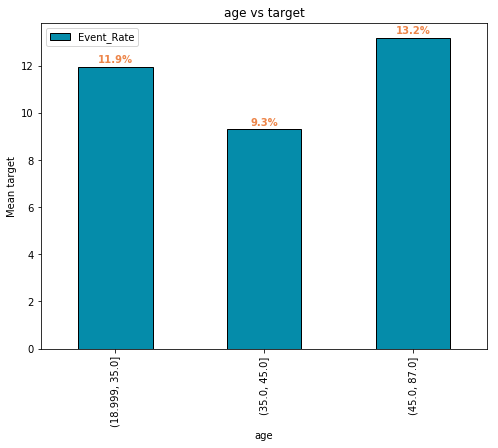

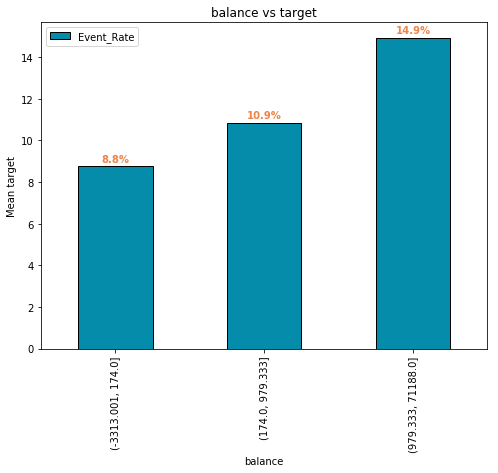

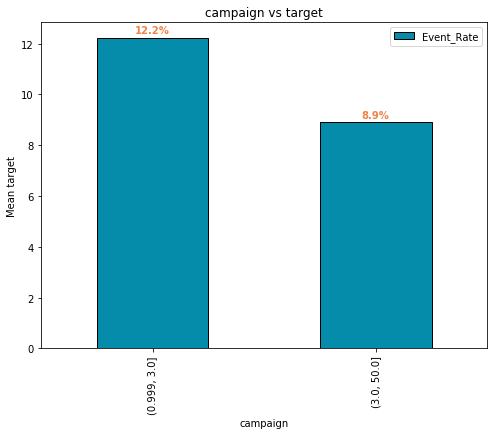

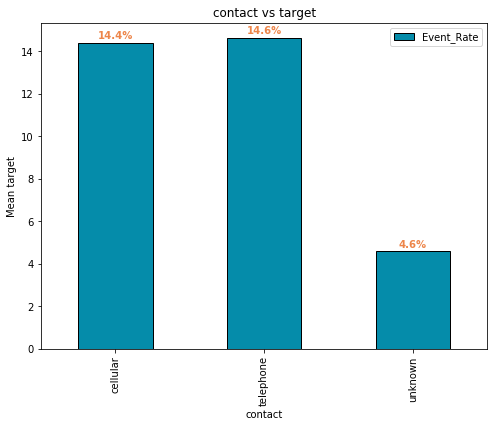

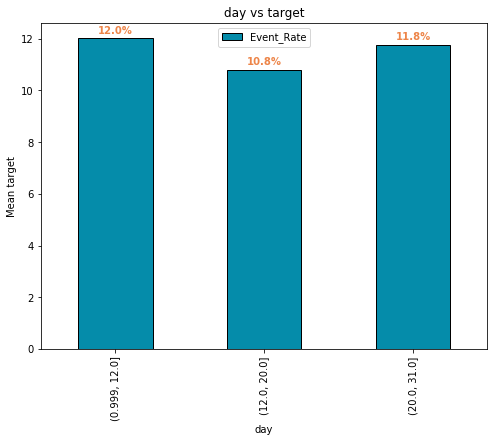

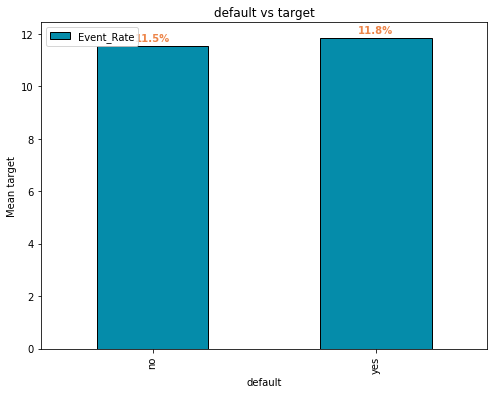

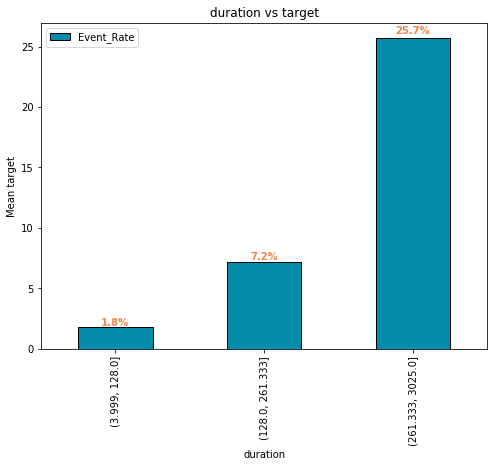

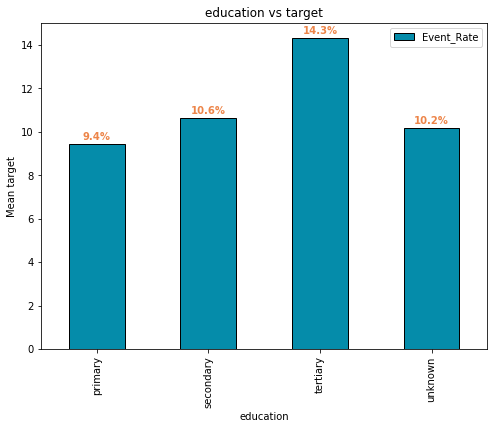

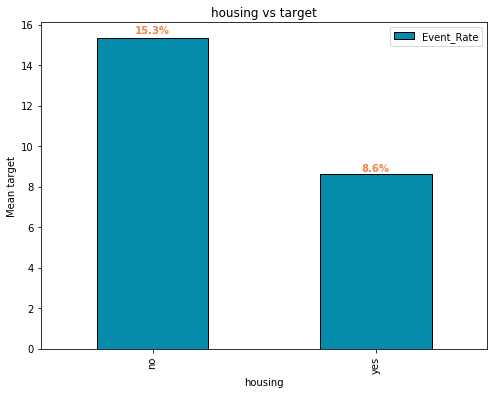

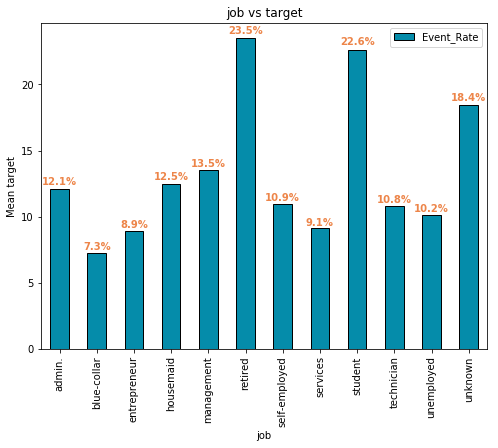

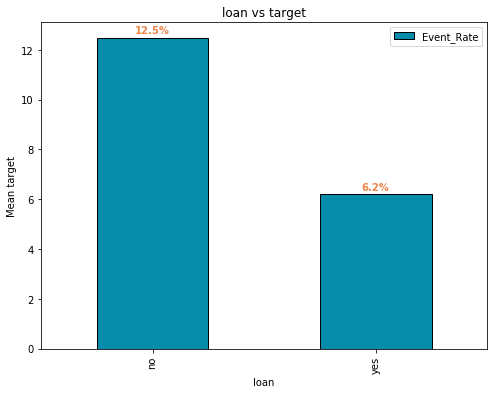

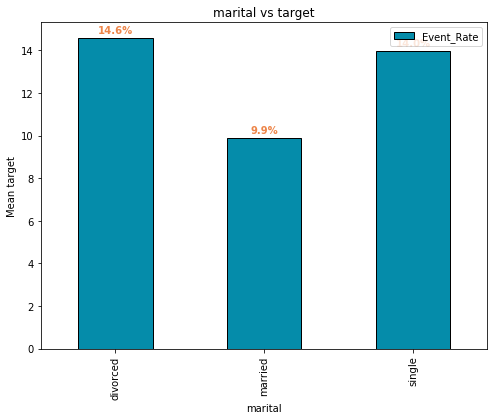

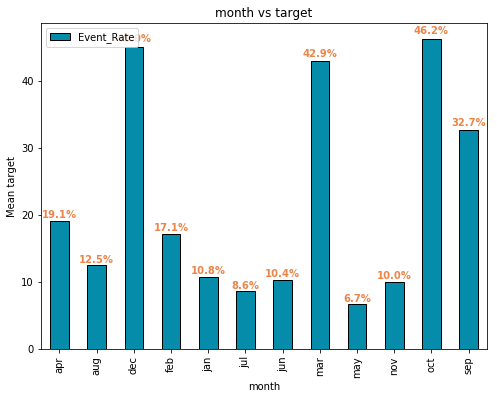

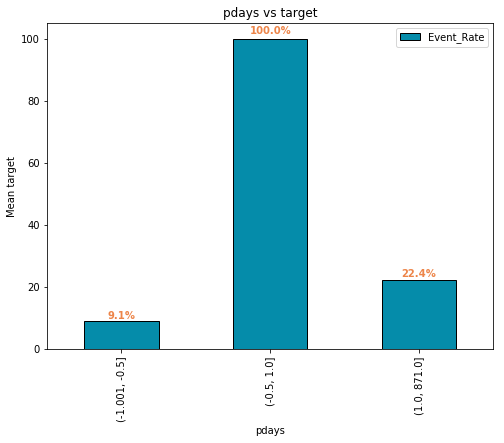

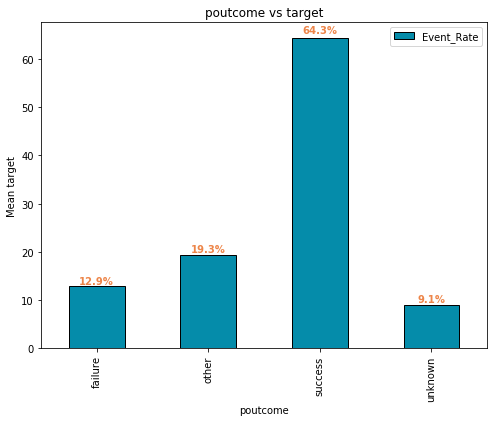

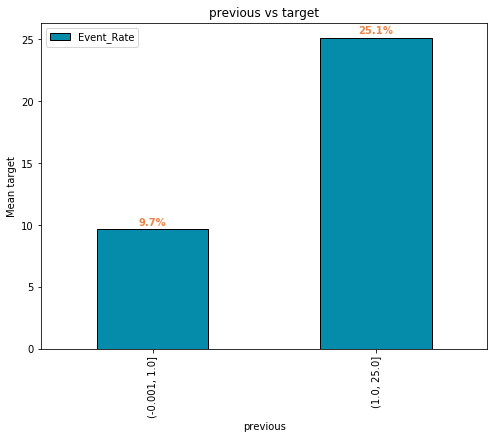

BarCharts(bar_color='#058caa', bar_type='v', exclude_features=None,
     feature_names='all', fig_size=(8, 6), num_color='#ed8549',
     plot_metric='mean')

In [46]:
#%matplotlib inline
clf.plot(woe_df)

# 5. VotingSelector

Select the input features for a binary model prediction using voting technique. Apply multiple feature selection techniques (Linear and Non linear) on the dataset and calculate the vote secured by all input features for a given binary target.

In [47]:
X, y = prep_dataset()

In [48]:
from xverse.ensemble import VotingSelector

clf = VotingSelector()
clf.fit(X, y)

VotingSelector(exclude_features=None, feature_names='all',
        handle_category='woe', minimum_votes=0, no_of_features=8,
        numerical_missing_values='median',
        selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [49]:
clf.available_techniques

['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE']

In [50]:
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,duration,1.160680,0.290617,0.000000,0.239958,62.530456,0.000983
1,poutcome,0.461890,0.060349,0.814954,0.083421,209.178869,0.278833
2,month,0.379533,0.080079,0.627071,0.096142,54.810115,0.187631
3,contact,0.247762,0.022624,0.455949,0.026844,25.357948,0.048756
4,pdays,0.203267,0.046254,0.000000,0.029523,13.808926,-0.000269
5,previous,0.177081,0.026980,0.000000,0.022573,13.019278,0.000000
6,job,0.132519,0.057603,0.520796,0.061058,13.043320,0.112761
7,housing,0.106556,0.019606,0.281356,0.021153,28.043094,0.000000
8,balance,0.061574,0.103128,0.000000,0.090839,0.037203,-0.000001
9,loan,0.060791,0.007986,0.641481,0.013221,3.436103,0.000000


In [51]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
1,poutcome,1,1,1,1,1,1,6
2,month,1,1,1,1,1,1,6
6,job,1,1,1,1,1,1,6
0,duration,1,1,0,1,1,1,5
3,contact,1,0,1,0,1,1,4
4,pdays,1,1,0,0,1,0,3
7,housing,1,0,1,0,1,0,3
12,age,0,1,0,1,0,1,3
14,day,0,1,0,1,0,1,3
5,previous,1,0,0,0,1,0,2


In [52]:
clf.transform(X).head()

,poutcome,month,job,duration,contact,pdays,housing,age,day,previous,balance,campaign,loan,marital,education,default
0,-0.263692,1.888017,-0.141683,79,0.252971,-1,0.330235,30,19,0,1787,1,0.090598,-0.169697,-0.222812,-0.000534
1,0.124650,-0.603059,-0.261650,220,0.252971,339,-0.325552,33,11,4,4789,1,-0.674391,-0.169697,-0.091389,-0.000534
2,0.124650,0.595591,0.182479,185,0.252971,330,-0.325552,35,16,1,1350,1,0.090598,0.219951,0.247404,-0.000534
3,-0.263692,-0.119785,0.182479,199,-0.992072,-1,-0.325552,30,3,0,1476,4,-0.674391,-0.169697,0.247404,-0.000534
4,-0.263692,-0.603059,-0.504101,226,-0.992072,-1,-0.325552,59,5,0,0,1,0.090598,-0.169697,-0.091389,-0.000534


## 5.1 Available options in the package for VotingSelector

    Parameters
    ----------
    
    feature_names: 'all' or list (default='all')
        list of features to perform WOE transformation. 
        'all' (default) - All categorical features in the dataset will be used
        list of features - ['age', 'income',......]
    
    exclude_features: list (default=None)
        list of features to be excluded from WOE transformation.
        - Example - ['age', 'income', .......]
    
    selection_techniques: 'all', 'quick' or list(default='all')
        List of selection techniques to be applied on the data. Available techniques - Weight of evidence ('WOE'), Random Forest ('RF'), Recursive Feature Elimination ('RFE'), Extra Trees Classifier ('ETC'), Chi Square ('CS'), L1 feature selection ('L_ONE').
        
        'all' - Apply all selection techniques ['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE']
        'quick' - ['WOE','RF','ETC']
        list - user provided list of feature selection techniques from available techniques 
    
    no_of_featues: 'auto', 'sqrt' or int(default='auto')
        Number of features to be selected by each selection technique.
        'auto' - len(features)/2
        'sqrt' - sqrt(len(features)) rounded to the lowest number
        int - user provided number in integer format
    
    handle_category= 'woe' or 'le' (default='woe')
        Handle category values transformation using Label encoder or Weight of Evidence option. Takes care of missing values too. It treats missing values as separate level.
        'woe' - use weight of evidence transformation
        'le' - use label encoder transformation
    
    numerical_missing_values= 'median', 'mean' or 0 (default='median')
        Handle numerical variable missing values.
        'median' - use median of the column
        'mean' - use mean of the column
        0 - use 0 to impute the missing values
    
    minimum_votes = int (default=0)
        Minimum number of votes needed to select a variable after feature selection. Only used in the transform process. Default value is set to 0 to select all variables.

## 5.2 Future transformation and select variables with minimum number of votes

In [53]:
clf.minimum_votes = 3 #select variables whihc got atleast 3 votes

In [54]:
clf.transform(X).head()

,poutcome,month,job,duration,contact,pdays,housing,age,day
0,-0.263692,1.888017,-0.141683,79,0.252971,-1,0.330235,30,19
1,0.124650,-0.603059,-0.261650,220,0.252971,339,-0.325552,33,11
2,0.124650,0.595591,0.182479,185,0.252971,330,-0.325552,35,16
3,-0.263692,-0.119785,0.182479,199,-0.992072,-1,-0.325552,30,3
4,-0.263692,-0.603059,-0.504101,226,-0.992072,-1,-0.325552,59,5


## 5.3 Subset feature selection option

In [55]:
clf = VotingSelector(selection_techniques=['WOE', 'RF', 'RFE', 'ETC'])
clf.fit(X, y)

VotingSelector(exclude_features=None, feature_names='all',
        handle_category='woe', minimum_votes=0, no_of_features=8,
        numerical_missing_values='median',
        selection_techniques=['WOE', 'RF', 'RFE', 'ETC'])

In [56]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Votes
1,poutcome,1,1,1,1,4
2,month,1,1,1,1,4
6,job,1,1,1,1,4
0,duration,1,1,0,1,3
3,contact,1,0,1,0,2
4,pdays,1,1,0,0,2
7,housing,1,0,1,0,2
8,balance,0,1,0,1,2
12,age,0,1,0,1,2
14,day,0,1,0,1,2


# 6. Pipeline feature

In [57]:
from sklearn.pipeline import Pipeline

clf = Pipeline(steps=[('split_x_y', SplitXY(['target'])),('feature_votes', VotingSelector())])

In [58]:
clf.fit(df, df['target'])

Pipeline(memory=None,
     steps=[('split_x_y', SplitXY(feature_names=['target'])), ('feature_votes', VotingSelector(exclude_features=None, feature_names='all',
        handle_category='woe', minimum_votes=0, no_of_features=8,
        numerical_missing_values='median',
        selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE']))])

In [59]:
clf.transform(df).head()

,poutcome,month,job,duration,contact,pdays,housing,age,day,previous,balance,campaign,loan,marital,education,default
0,-0.263692,1.888017,-0.141683,79,0.252971,-1,0.330235,30,19,0,1787,1,0.090598,-0.169697,-0.222812,-0.000534
1,0.124650,-0.603059,-0.261650,220,0.252971,339,-0.325552,33,11,4,4789,1,-0.674391,-0.169697,-0.091389,-0.000534
2,0.124650,0.595591,0.182479,185,0.252971,330,-0.325552,35,16,1,1350,1,0.090598,0.219951,0.247404,-0.000534
3,-0.263692,-0.119785,0.182479,199,-0.992072,-1,-0.325552,30,3,0,1476,4,-0.674391,-0.169697,0.247404,-0.000534
4,-0.263692,-0.603059,-0.504101,226,-0.992072,-1,-0.325552,59,5,0,0,1,0.090598,-0.169697,-0.091389,-0.000534
